In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [ ]:
#----------------------------------------------------------CLASSIFICATION USING Multinomial Naive Bayes------------------------------------------------------
#--------------------------ABOUT DATASET------------------
#dataset traffic classification

#shape 5937, 2

#columns ->Comment,Emotion

#missing values->No Missing values

#dataset is balanced




#--------------------------Preprocessing-----------------------
#Remove Puntuation

#Remove stopwords,REmove white spaces

#Tokenization

#Normalizing text(stemming,lemmatization)

#Vectorization

#lable Encoder




#--------------------------feature selection----------------
#Correlation heat map only for numeric columns in this dataset only two columns
#two columns are important


#--------------------------Model Naive Bayes--------------------
#using sklearn
          #Accuracy: 0.9031986531986532
          #AUC-ROC Score: 0.9767583679110395
          #Precision: 0.9036858149024937
          #Recall: 0.9031986531986532
          #F1 Score: 0.9033014240181332
#without using sklearn
          #Accuracy: 0.9015151515151515
          #Precision: 0.9013421363942585
          #Recall: 0.9014360474510551
          #F1 Score: 0.901248254974282

In [3]:
df=pd.read_csv('/content/drive/MyDrive/week2_python/Emotion_classify_Data.csv')

In [ ]:
df.head()

,Comment,Emotion
0,i seriously hate one subject to death but now ...,fear
1,im so full of life i feel appalled,anger
2,i sit here to write i start to dig out my feel...,fear
3,ive been really angry with r and i feel like a...,joy
4,i feel suspicious if there is no one outside l...,fear


In [ ]:
df.describe()

,Comment,Emotion
count,5937,5937
unique,5934,3
top,i feel like a tortured artist when i talk to her,anger
freq,2,2000


In [8]:
df.columns

Index(['Comment', 'Emotion'], dtype='object')

In [ ]:
print(df['Emotion'].unique())

['fear' 'anger' 'joy']


In [ ]:
df.isnull().sum()

Comment    0
Emotion    0
dtype: int64

<Axes: >

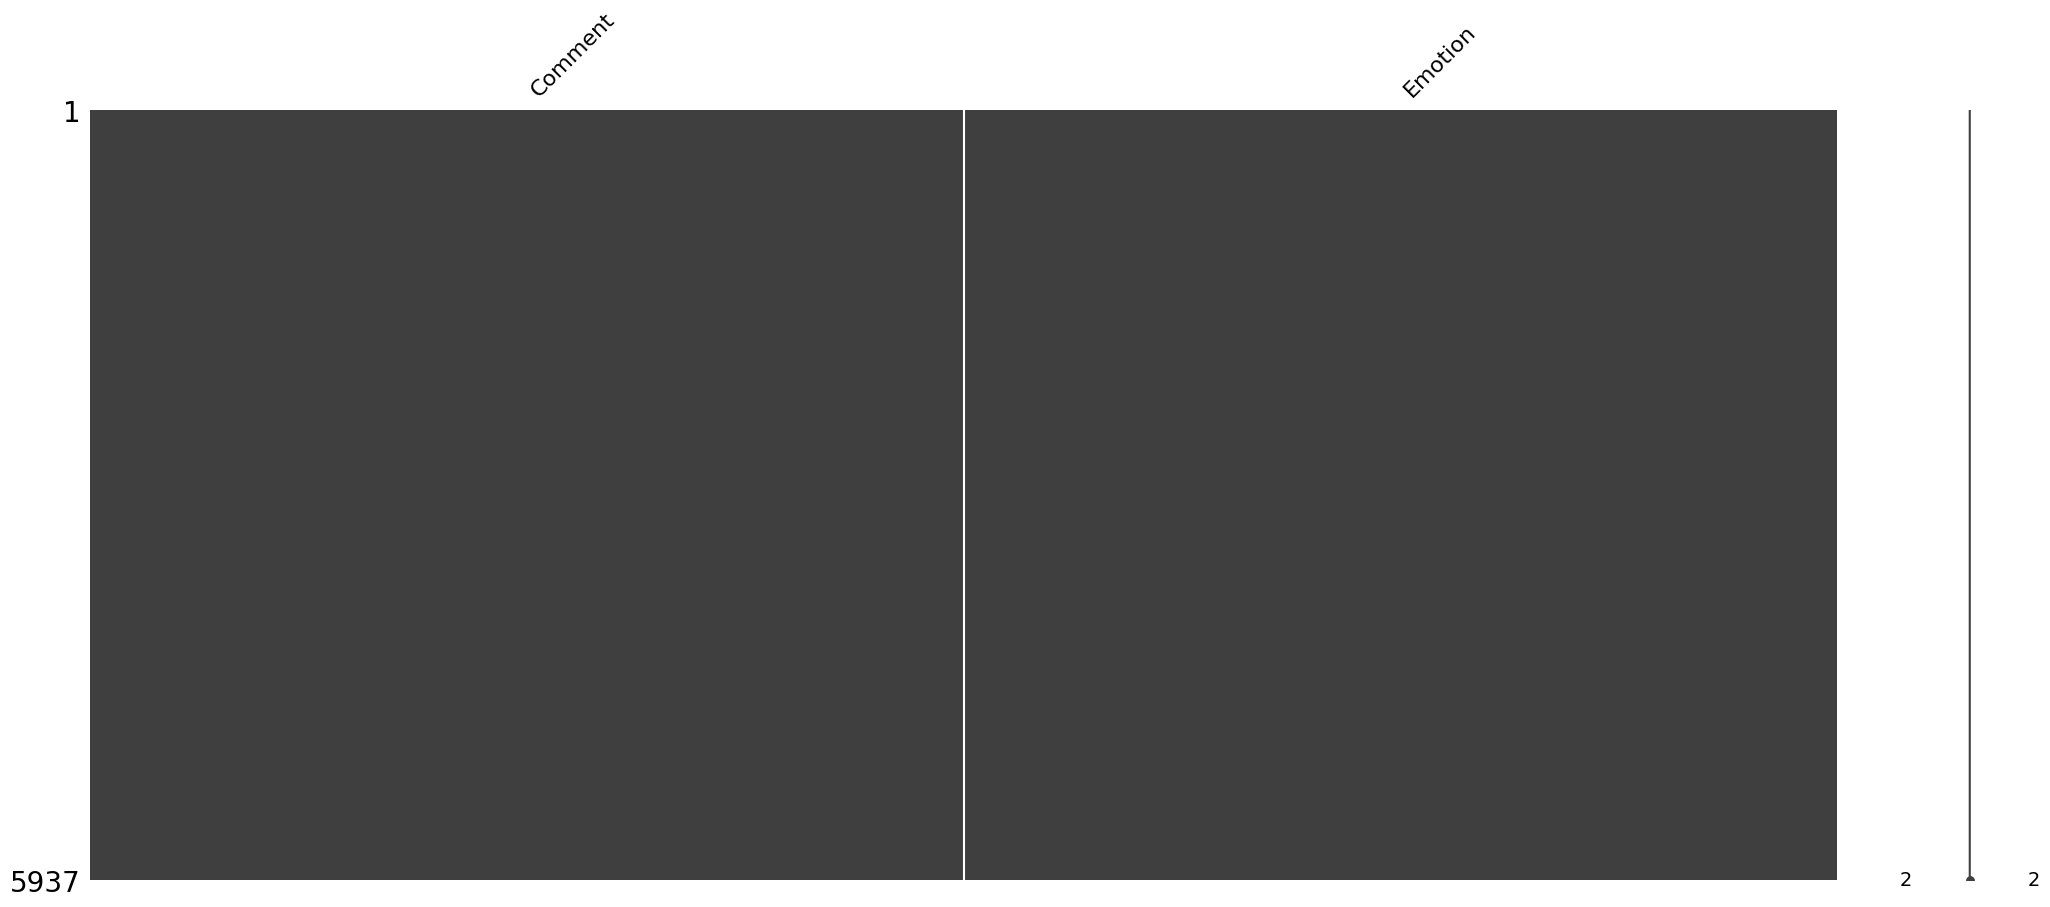

In [6]:
msno.matrix(df)

<Axes: xlabel='Emotion', ylabel='count'>

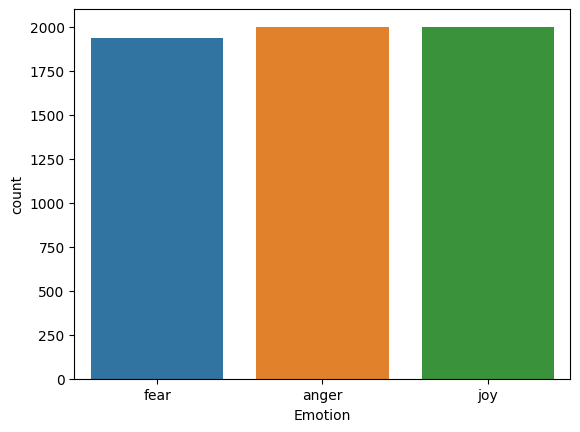

In [ ]:
sns.countplot(x = df['Emotion'])

In [11]:
# Expand Contraction
!pip install contractions
import contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 6.8 MB/s eta 0:00:00


In [12]:
# applying fuction for contracting text
df['Comment']=df['Comment'].apply(lambda x:contractions.fix(str(x)))

In [13]:
# Remove Punctuations
import string
def remove_punctuation(text):
  '''This function is for removing punctuation'''
   # replacing the punctuations with no space, hence punctuation marks will be removed
  translator = text.translate(str.maketrans('', '', string.punctuation))
  # return the text stripped of punctuation marks
  return (translator)
#remove punctuation using function created
df['Comment'] = df['Comment'].apply(remove_punctuation)

In [14]:
# Remove Stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [15]:
# creating object for english stopwords
sw = stopwords.words('english')
def remove_stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

df['Comment'] = df['Comment'].apply(remove_stopwords)

In [16]:
# Remove White spaces
df['Comment'] =df['Comment'].apply(lambda x: " ".join(x.split()))

In [17]:
# Tokenization
df['Comment'] = df['Comment'].apply(nltk.word_tokenize)

In [ ]:
df.sample(3)

,Comment,Emotion
761,"[care, much, number, viewers, viewer, ratings,...",anger
148,"[feel, motivation, satisfied, read, write, als...",joy
3008,"[planned, still, days, feel, stressed, point, ...",anger


In [18]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

#applying Lemmatization
from nltk.stem import WordNetLemmatizer

# Create a lemmatizer
lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(tokens):
  '''function for lemmatization'''
  lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
  return lemmatized_tokens

# Lemmatize the 'Review' column
df['Comment'] = df['Comment'].apply(lemmatize_tokens)

In [19]:
# let's create tokens for text data
from sklearn.feature_extraction.text import  TfidfVectorizer
vectorizer = TfidfVectorizer(tokenizer=lambda x: x, lowercase=False)
X = df['Comment']
X= vectorizer.fit_transform(X)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [20]:
# collect the vocabulary items used in the vectorizer to see them
dictionary = vectorizer.vocabulary_.items()
dictionary

dict_items([('seriously', 6122), ('hate', 3171), ('one', 4809), ('subject', 6734), ('death', 1688), ('feel', 2571), ('reluctant', 5707), ('drop', 2087), ('full', 2833), ('life', 4028), ('appalled', 335), ('sit', 6289), ('write', 7847), ('start', 6599), ('dig', 1880), ('feeling', 2574), ('think', 7026), ('afraid', 147), ('accept', 34), ('possibility', 5234), ('might', 4379), ('make', 4206), ('really', 5586), ('angry', 273), ('r', 5507), ('like', 4043), ('idiot', 3417), ('trusting', 7241), ('first', 2642), ('place', 5143), ('suspicious', 6834), ('outside', 4877), ('rapture', 5550), ('happened', 3136), ('something', 6450), ('jealous', 3740), ('becasue', 599), ('wanted', 7610), ('kind', 3852), ('love', 4143), ('true', 7234), ('connection', 1382), ('two', 7283), ('soul', 6476), ('friend', 2805), ('mine', 4398), ('keep', 3829), ('telling', 6955), ('morbid', 4470), ('thing', 7025), ('dog', 2013), ('finally', 2621), ('fell', 2577), ('asleep', 410), ('useless', 7456), ('still', 6639), ('anxiety

In [21]:
# Get unique labels from the 'Emotion' column
unique_labels = df['Emotion'].unique()

# Create a mapping for each unique label
emotion_mapping = {label: idx for idx, label in enumerate(unique_labels)}

# Map the 'Emotion' column to numerical values
df['Emotion_num'] = df['Emotion'].map(emotion_mapping)


In [ ]:
print(df['Emotion_num'].unique())

[0 1 2]


In [22]:
y = df['Emotion_num']

In [23]:
import numpy as np
from scipy.sparse import coo_matrix

# Assuming X and y are already defined as follows:
# X = df['Comment']
# y = df['Emotion_num']

# Convert X to a dense array if it's a sparse matrix
X_dense = X.toarray() if isinstance(X, coo_matrix) else X

# Set a random seed for reproducibility
np.random.seed(42)

# Define the proportion of data for training (e.g., 80%)
train_proportion = 0.8

# Determine the number of samples for training
num_train_samples = int(train_proportion * X_dense.shape[0])

# Create an array of indices for shuffling
indices = np.arange(X_dense.shape[0])
np.random.shuffle(indices)

# Use the shuffled indices to split the data
train_indices = indices[:num_train_samples]
test_indices = indices[num_train_samples:]

# Create training and testing sets
X_train = X[train_indices]
y_train = y[train_indices]
X_test = X[test_indices]
y_test = y[test_indices]


In [ ]:
print(y_train)

1867    0
3988    2
4516    1
1397    0
1669    0
       ..
5571    0
5368    2
1279    1
5817    0
1555    0
Name: Emotion_num, Length: 4749, dtype: int64


In [ ]:
import numpy as np
from collections import defaultdict
from scipy.sparse import issparse

class NaiveBayesClassifier:
    def __init__(self):
        self.class_probs = None
        self.word_probs = None
        self.classes = None

    def fit(self, X_train, y_train):
        # Convert X_train to a numpy array
        X_train = X_train.toarray() if issparse(X_train) else np.array(X_train)

        # Convert y_train to integers if it's not already
        y_train = np.array(y_train)

        # Calculate class probabilities
        self.classes, class_counts = np.unique(y_train, return_counts=True)
        self.class_probs = class_counts / len(y_train)

        # Create a dictionary to store word counts for each class
        word_counts_per_class = defaultdict(lambda: np.zeros(X_train.shape[1], dtype=int))

        # Count occurrences of each word in each class
        for i, c in enumerate(self.classes):
            X_c = X_train[y_train == c]
            word_counts_per_class[c] = np.sum(X_c, axis=0)

        # Calculate word probabilities for each class using Laplace smoothing
        self.word_probs = {c: (word_counts.astype(int) + 1) / (np.sum(word_counts) + X_train.shape[1])
                           for c, word_counts in word_counts_per_class.items()}

    def predict(self, X_test):
        predictions = []

        # Convert X_test to a numpy array
        X_test = X_test.toarray() if issparse(X_test) else np.array(X_test)

        for x in X_test:
            # Calculate log probabilities for each class
            log_probs = np.log(self.class_probs)

            # Add log probabilities for each word in the document
            for word_index, count in enumerate(x):
                for c in self.classes:
                    log_probs[c] += count * np.log(self.word_probs[c][word_index])

            # Predict the class with the highest log probability
            prediction = np.argmax(log_probs)
            predictions.append(prediction)

        return predictions

    def evaluate_metrics(self, true_labels, predicted_labels):
        # Confusion Matrix
        confusion_matrix = np.zeros((len(self.classes), len(self.classes)), dtype=int)
        for true_label, predicted_label in zip(true_labels, predicted_labels):
            confusion_matrix[true_label, predicted_label] += 1

        # Precision, Recall, F1 Score
        precision = np.zeros(len(self.classes))
        recall = np.zeros(len(self.classes))
        f1 = np.zeros(len(self.classes))

        for i in range(len(self.classes)):
            true_positive = confusion_matrix[i, i]
            false_positive = np.sum(confusion_matrix[:, i]) - true_positive
            false_negative = np.sum(confusion_matrix[i, :]) - true_positive

            # Precision
            precision[i] = true_positive / (true_positive + false_positive) if (true_positive + false_positive) != 0 else 0

            # Recall
            recall[i] = true_positive / (true_positive + false_negative) if (true_positive + false_negative) != 0 else 0

            # F1 Score
            f1[i] = 2 * (precision[i] * recall[i]) / (precision[i] + recall[i]) if (precision[i] + recall[i]) != 0 else 0

        # Calculate the average precision, recall, and F1 Score
        avg_precision = np.mean(precision)
        avg_recall = np.mean(recall)
        avg_f1 = np.mean(f1)

        # Accuracy
        accuracy = np.mean(true_labels == predicted_labels)

        return accuracy, avg_precision, avg_recall, avg_f1

# Example usage:
nb_classifier = NaiveBayesClassifier()
nb_classifier.fit(X_train, y_train)
predictions = nb_classifier.predict(X_test)

# Evaluate metrics
accuracy, avg_precision, avg_recall, avg_f1 = nb_classifier.evaluate_metrics(y_test, predictions)

print("Accuracy:", accuracy)
print("Precision:", avg_precision)
print("Recall:", avg_recall)
print("F1 Score:", avg_f1)


Accuracy: 0.9015151515151515
Precision: 0.9013421363942585
Recall: 0.9014360474510551
F1 Score: 0.9012482549742821


In [ ]:
# Create training and testing sets
X_train = X[train_indices]
y_train = y[train_indices]
X_test = X[test_indices]
y_test = y[test_indices]

Accuracy: 0.9031986531986532
Confusion Matrix:
 [[351  34  12]
 [ 21 347  15]
 [ 17  16 375]]
AUC-ROC Score: {0: 0.9767583679110395, 1: 0.9805831698100969, 2: 0.9831290849673203}
Precision: 0.9036858149024937
Recall: 0.9031986531986532
F1 Score: 0.9033014240181332
Class 0:
TP: 351, FP: 38, TN: 753, FN: 46
Class 1:
TP: 347, FP: 50, TN: 755, FN: 36
Class 2:
TP: 375, FP: 27, TN: 753, FN: 33


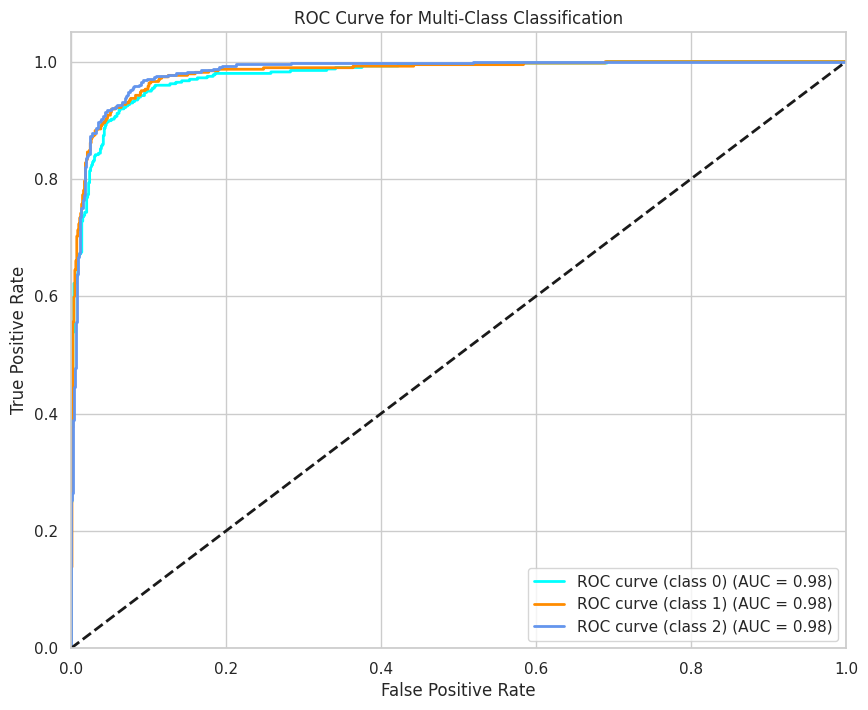

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize

# Assuming X_train, X_test, y_train, y_test are your training and testing data

# Use scikit-learn's MultinomialNB
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
predictions = nb_classifier.predict(X_test)

# Evaluate metrics
accuracy = metrics.accuracy_score(y_test, predictions)
precision = metrics.precision_score(y_test, predictions, average='weighted')
recall = metrics.recall_score(y_test, predictions, average='weighted')
f1_score = metrics.f1_score(y_test, predictions, average='weighted')

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Calculate class probabilities for AUC-ROC Curve
class_probabilities = nb_classifier.predict_proba(X_test)

# Binarize the labels
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(np.unique(y_test))):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], class_probabilities[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Calculate TP, FP, TN, FN for each class
TP = conf_matrix.diagonal()
FP = conf_matrix.sum(axis=0) - TP
FN = conf_matrix.sum(axis=1) - TP
TN = conf_matrix.sum() - (TP + FP + FN)

# Print metrics
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("AUC-ROC Score:", roc_auc)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)

# Print TP, FP, TN, FN for each class
for i in range(len(TP)):
    print(f"Class {i}:")
    print(f"TP: {TP[i]}, FP: {FP[i]}, TN: {TN[i]}, FN: {FN[i]}")

# Plot ROC curves
plt.figure(figsize=(10, 8))
colors = ['aqua', 'darkorange', 'cornflowerblue', 'red', 'green', 'purple']  # Add more colors as needed
for i, color in zip(range(len(np.unique(y_test))), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve (class {i}) (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class Classification')
plt.legend(loc="lower right")
plt.show()
